In [1]:
path2data = "../data/interim/grasp/"

import glob
import os
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pylab as plt

def create_image_list():
    # Creating a list with all the image paths
    folders = range(1,11)
    folders = ['0'+str(i) if i<10 else '10' for i in folders]
    filenames = []
    for i in folders:
        for name in glob.glob(os.path.join(path2data, i, 'pcd'+i+'*r.png')):
            filenames.append(name)
    return filenames
            

def _process_bboxes(name):
    '''Create a list with the coordinates of the grasping rectangles. Every 
    element is either x or y of a vertex.'''
    with open(name, 'r') as f:
        bboxes = list(map(
              lambda coordinate: float(coordinate), f.read().strip().split()))
    return bboxes

def load_img_label(filename):    
    bbox = filename[:-5]+'cpos.txt'
    #bbox = filename[:-5]+'cneg.txt'
    bboxes = _process_bboxes(bbox)
    img = Image.open(filename)
    return img,bboxes

In [2]:
filenames = create_image_list()
f1 = filenames[0]
img, label = load_img_label(f1)
print(f1)
label

../data/interim/grasp/01/pcd0179r.png


[271.0,
 281.0,
 277.0,
 305.0,
 297.0,
 300.0,
 291.0,
 276.0,
 254.0,
 278.556,
 258.0,
 306.0,
 280.0,
 303.0,
 276.0,
 275.556,
 242.0,
 274.708,
 243.0,
 304.0,
 266.0,
 303.0,
 265.0,
 273.708,
 223.0,
 279.78,
 228.0,
 307.0,
 251.0,
 303.0,
 246.0,
 275.78,
 210.0,
 286.225,
 215.0,
 307.0,
 236.0,
 302.0,
 231.0,
 281.225,
 319.0,
 298.805,
 317.0,
 273.0,
 294.0,
 275.0,
 296.0,
 300.805]

In [3]:
def show_img_label(img,label, thickness=2, size=100):  
    plt.figure(figsize=(size, size))
    # draw a rectangle 
    draw = ImageDraw.Draw(img) 
    draw.polygon(label[-8:], outline="blue")    
    plt.imshow(np.asarray(img))

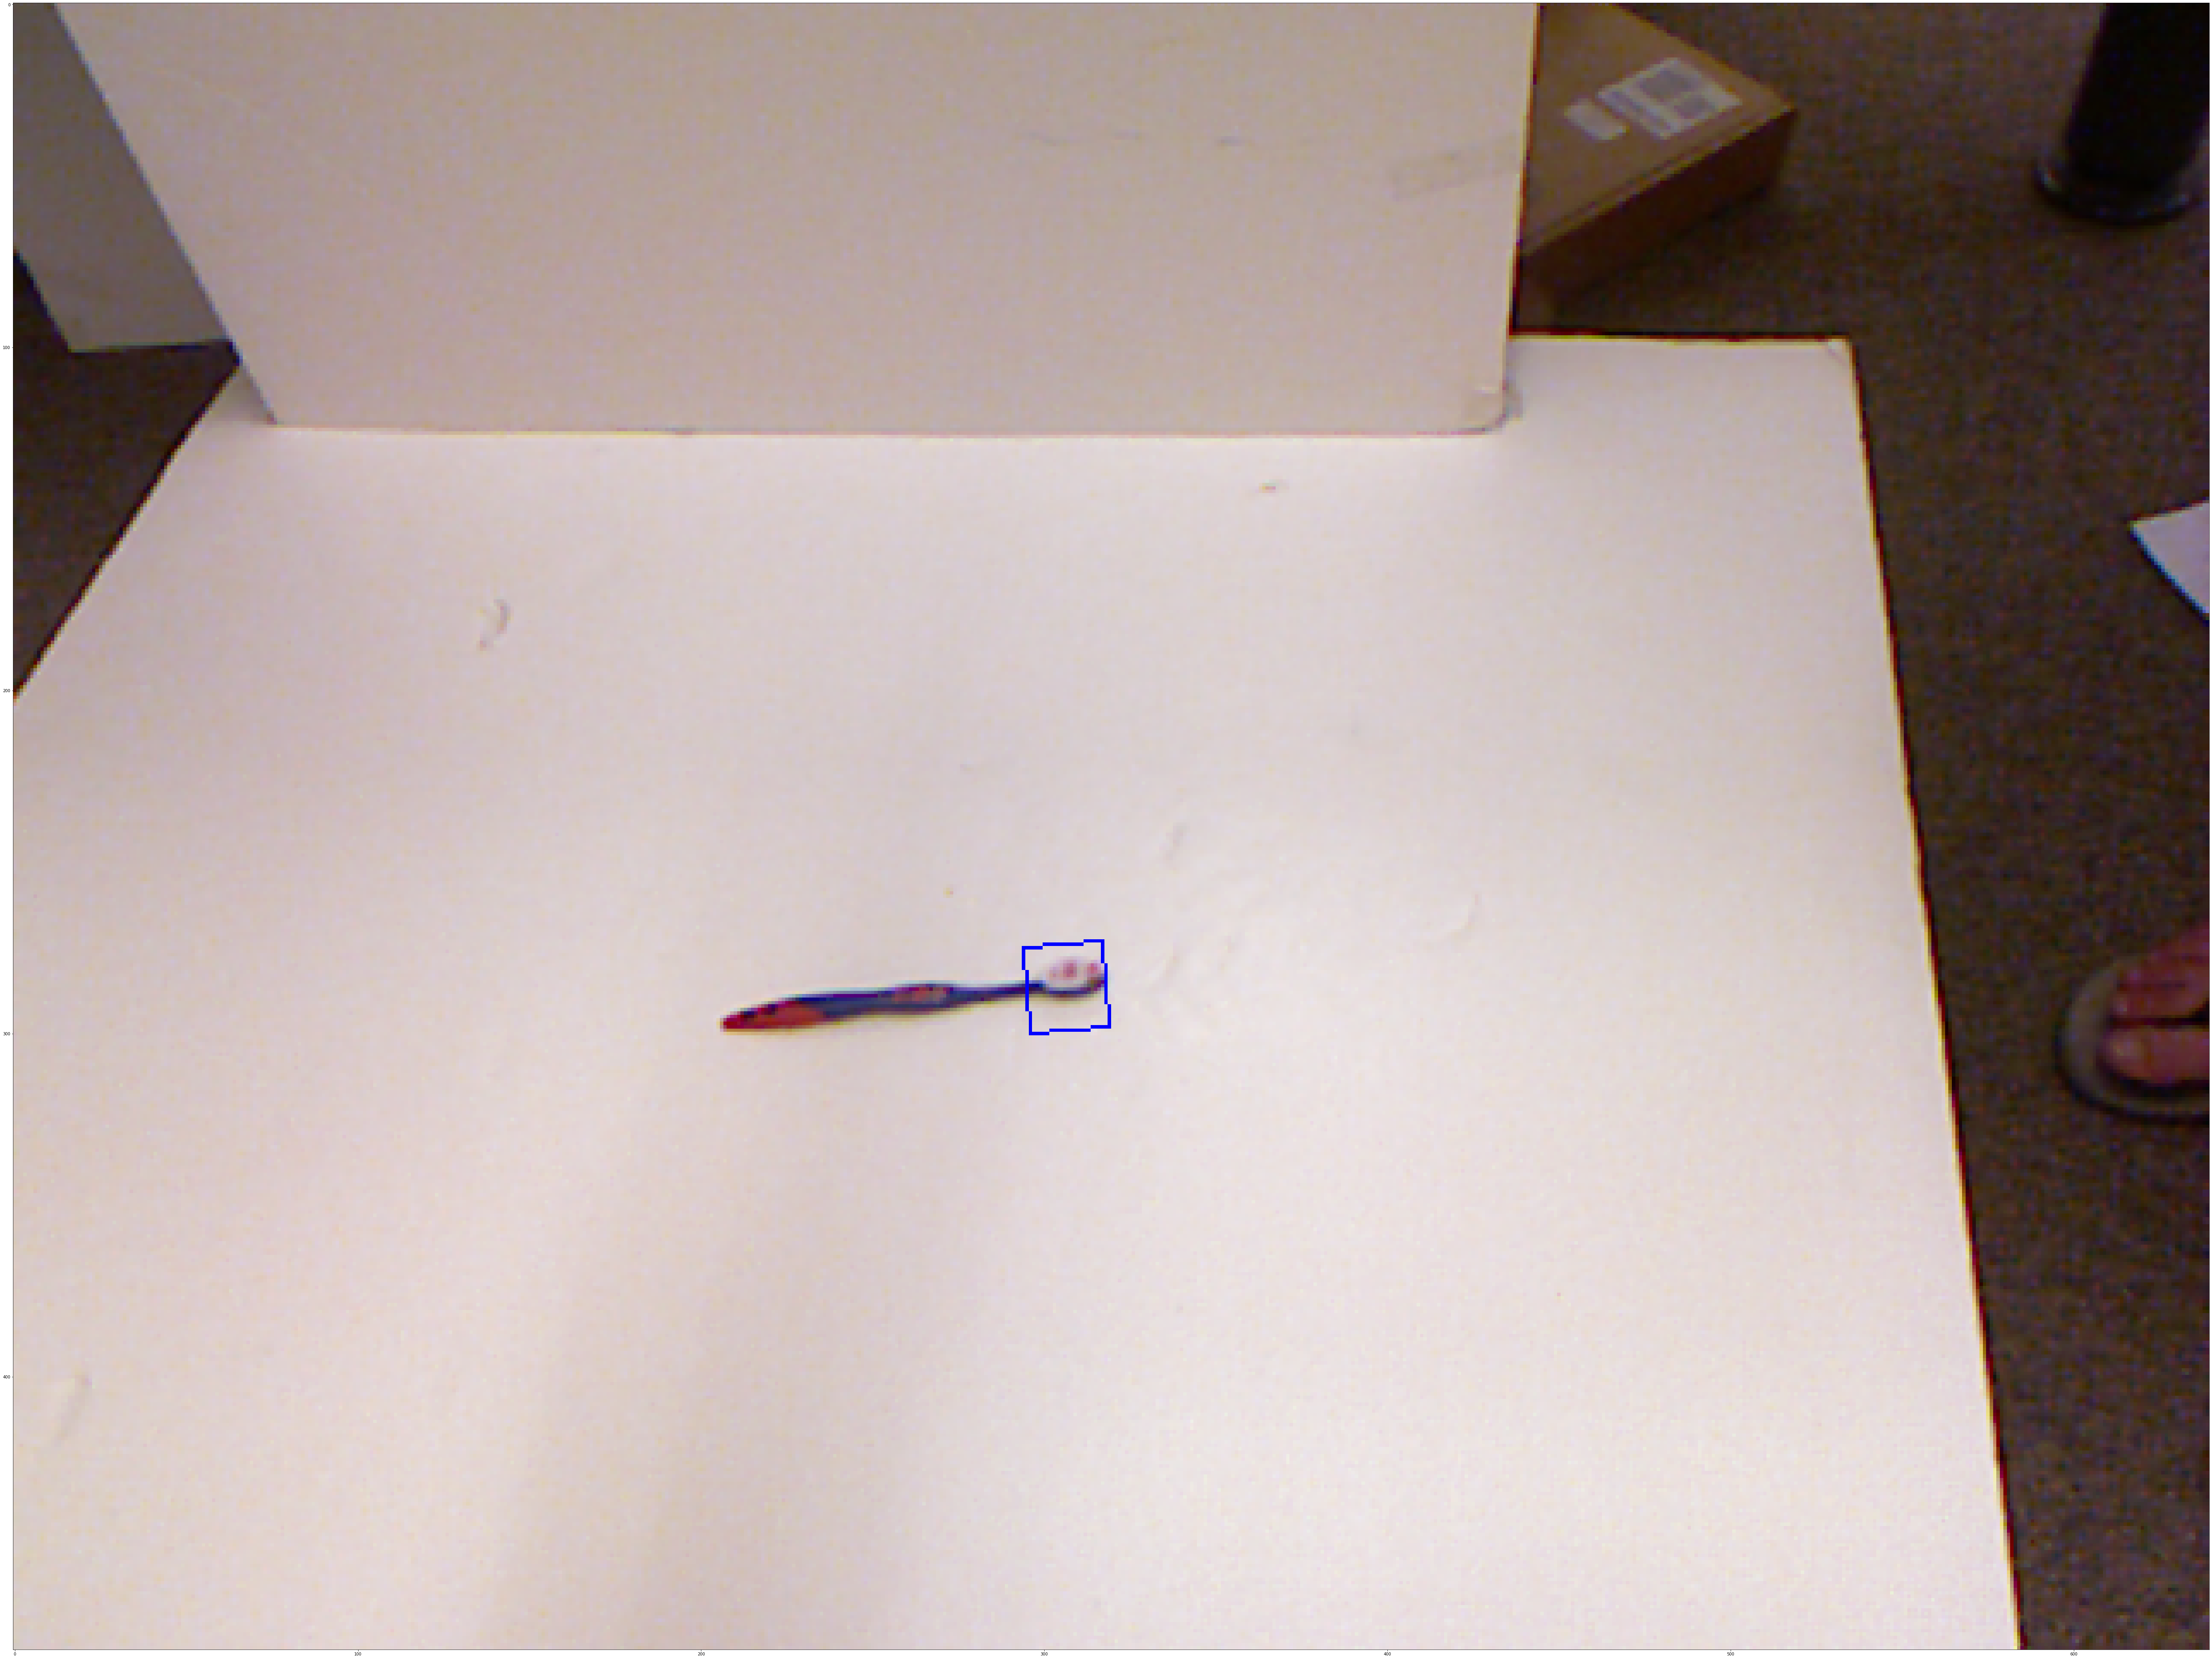

In [4]:
show_img_label(img, label)


In [5]:
len(filenames)

885